In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'SimHei'
from igraph import *
import pickle
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
usecols = ["stat_date", "uid", "onlinetime", "level", "upvote","onlinetime_list","corpid", "carteamid", "vclientip","country",
            "friend_num_plat", "friend_list_plat", "active_plat_num", "friend_num_game","friend_list_game", "active_game_num", "jiyounum", "lianrennum", "sidangnum", "guiminum",
            "jiyou", "lianren", "sidang", "guimi", "chg_intimacy", "avg_intimacy", "gender", "chat_num", "friend_chat_num", "send_gold_num",
            "draw_gold_num", "vote_num", "friend_vote_num", "give_gift_num", "get_gift_num", "recruit_num", "friend_recruit_num", 
            "reply_recruit_num", "team_num", "leader_team_num", "invite_team_num", "apply_relation_num", "reply_relation_num",
            "del_friend_num", "invite_carteam_num", "friend_carteam_num", "carteam_leaader_num", "accept_carteam_num", "corps_active_change",
            "uid_corp_active_change", "corps_level_change", "suc_match_num", "create_corp_num", "signup_num", "achievement_num", 
            "chat_uid_num", "friend_uid_num", "reject_friend_num", "del_friend_apply_num", "reject_relation_num", "del_intimacy_num",
            "exit_carteam_num", "kick_num", "bekick_num", "del_carteam_num", "transfer_carteam_num", "accept_invite_team_num",
            "reject_invite_team_num", "beaccept_invite_team_num", "bereject_invite_team_num", "beaccept_apply_team_num", 
            "bereject_apply_team_num", "accept_apply_team_num", "reject_apply_team_num", "join_corp_num", "space_req_num",
            "space_bereq_num", "space_gift_num", "space_gift_unum", "login_num", "login_days", "is_comeback", "playerlang", 
            "onlinetime_detail", "bevote_num", "corp_money_chg", "funny_mode_num", "funny_single_num", "funny_double_num", "funny_squad_num",
            "round_num", "avg_kill_count", "avg_hit_rate", "chicken_rate", "top10_rate", "avg_damage", "avg_box_num", "avg_survivaltime",
            "avg_moving", "head_shoot_rate", "avg_gun_kill", "avg_assist", "avg_healtimes", "avg_healamount", "avg_cure",
            "round_single_num", "round_double_num", "round_squad_num", "first_single_segment", "first_dou_segment", "first_squad_segment",
            "third_single_segment", "third_dou_segment", "third_squad_segment", "first_single_score", "first_dou_score", "first_squad_score", 
            "third_single_score", "third_dou_score", "third_squad_score", "systemhardware", "platid", "diamond_add_4week", "register_days", 
            "content_sample", "ratingvalueafterchanged", "final_score", "diamond_add", "diamond_reduce_4week", "diamond_reduce", 
            "classical_num", "funny_num", "tpp_num", "fpp_num", "solo_num", "duo_num", "squad_num", "funny_quick_num","funny_sniper_num",
            "funny_war_num", "segment", "classical_team_rate",  "avg_collectindex", "avg_fps",
            "funny_team_rate", "is_register_month", "last_login_date", "avg_hit_distance", "reward_num", "share_num", "register_time", 
            "is_etc", "is_vpn", "daily_buy_num", "game_start_num", "skin_num"
]
len(usecols)

156

In [3]:
personal = ["onlinetime", "level", "upvote","signup_num", "achievement_num","login_num", "login_days", "round_num",
            "round_squad_num","segment", "reward_num", "skin_num"]
relations = [ "friend_num_plat", "active_plat_num", "friend_num_game","active_game_num", "chat_num", "friend_chat_num",
            "send_gold_num", "draw_gold_num", "vote_num", "friend_vote_num","recruit_num", "friend_recruit_num", 
            "reply_recruit_num","team_num", "leader_team_num", "invite_team_num", "apply_relation_num", "reply_relation_num",
            "del_friend_num","reject_friend_num", "del_friend_apply_num", "reject_relation_num", "del_intimacy_num", "accept_invite_team_num",
            "reject_invite_team_num", "beaccept_invite_team_num", "bereject_invite_team_num", "beaccept_apply_team_num", 
            "bereject_apply_team_num", "accept_apply_team_num", "reject_apply_team_num"]
performance = ["avg_kill_count", "avg_hit_rate", "chicken_rate", "top10_rate", "avg_damage", "avg_box_num", "avg_survivaltime",
            "avg_moving", "head_shoot_rate", "avg_gun_kill", "avg_assist", "avg_healtimes", "avg_healamount", "avg_cure","avg_hit_distance",
              "final_score"]

In [9]:
normal_accounts_0628 = pd.read_csv(r'data/normal_data_fea_20210628.txt', sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str, "is_comeback":bool,
                                       "is_register_month":bool, "is_vpn":bool, "is_etc":bool}, 
                                usecols= usecols,
                               na_values=['-1','\\N'])

normal_accounts_0621 = pd.read_csv(r'data/20210621_normal_data_fea.txt', sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str, "is_comeback":bool,
                                       "is_register_month":bool, "is_vpn":bool, "is_etc":bool}, 
                                usecols= usecols,
                               na_values=['-1','\\N'])

normal_accounts = pd.concat([normal_accounts_0621, normal_accounts_0628])
del(normal_accounts_0621)
del(normal_accounts_0628)

In [10]:
np.where(normal_accounts["uid"].apply(type) != str )
normal_accounts.drop(np.where(normal_accounts["uid"].apply(type) != str )[0], inplace=True)

In [11]:
normal_accounts.set_index("uid", inplace=True)
normal_accounts.shape

(199957, 155)

In [145]:
stealing_accounts_0628 = pd.read_csv(r'data/20210628_steal_fea_data.txt', sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str}, 
                                usecols= usecols,
                               na_values=['-1','\\N'])

In [146]:
stealing_accounts_0628.set_index("uid", inplace=True)
stealing_accounts_0628 = stealing_accounts_0628[np.logical_not(stealing_accounts_0628.index.duplicated())]
stealing_accounts_0628.shape

(56409, 155)

In [5]:
stealing_accounts_0726 = pd.read_csv(r'data/20210726_steal_fea_data.txt', sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str}, 
                                usecols= usecols,
                               na_values=['-1', '\\N'])
stealing_accounts_0726.shape

c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(54208, 156)

In [6]:
np.where(stealing_accounts_0726["uid"].apply(type) != str )
stealing_accounts_0726.drop(np.where(stealing_accounts_0726["uid"].apply(type) != str )[0], inplace=True)

In [7]:
stealing_accounts_0726.set_index("uid", inplace=True)
stealing_accounts_0726 = stealing_accounts_0726[np.logical_not(stealing_accounts_0726.index.duplicated())]
stealing_accounts_0726.shape

(53982, 155)

In [12]:
normal_accounts.drop(np.intersect1d(normal_accounts.index, stealing_accounts_0726.index), inplace=True)
normal_accounts.shape

(199772, 155)

In [13]:
normal_accounts["is_steal"] = False
stealing_accounts_0726["is_steal"] = True

In [14]:
all_accounts = pd.concat([normal_accounts, stealing_accounts_0726])
all_accounts.shape

(253754, 156)

In [15]:
all_accounts["ip_counts"] = all_accounts["vclientip"].value_counts()[all_accounts["vclientip"]].tolist()
personal += ["ip_counts"]

In [17]:
feature = "friend_num_plat"
print(all_accounts[feature].describe())
print(all_accounts[feature][all_accounts["is_steal"]].describe())
print(all_accounts[feature][np.logical_not(all_accounts["is_steal"])].describe())

count    253754.000000
mean         23.601906
std          47.621803
min           0.000000
25%           0.000000
50%           0.000000
75%          22.000000
max         200.000000
Name: friend_num_plat, dtype: float64
count    53982.000000
mean        14.803397
std         40.480183
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        200.000000
Name: friend_num_plat, dtype: float64
count    199772.000000
mean         25.979422
std          49.104915
min           0.000000
25%           0.000000
50%           1.000000
75%          27.000000
max         200.000000
Name: friend_num_plat, dtype: float64


In [18]:
print((all_accounts["friend_num_plat"][all_accounts["is_steal"]] ==0 ).mean(),
     (all_accounts["friend_num_plat"][np.logical_not(all_accounts["is_steal"])] ==0 ).mean())

0.6802823163276648 0.4870652543900046


In [19]:
all_accounts["friend_plat - friend_game"] = all_accounts["friend_num_plat"] - all_accounts["friend_num_game"]

<AxesSubplot:xlabel='friend_plat - friend_game', ylabel='Density'>

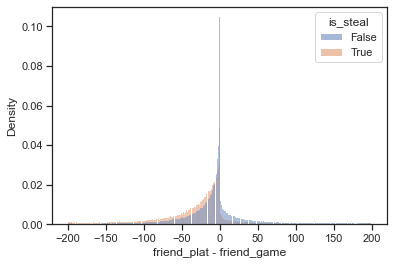

In [20]:
sns.histplot(all_accounts, x = "friend_plat - friend_game", hue = "is_steal", stat="density", common_norm=False)

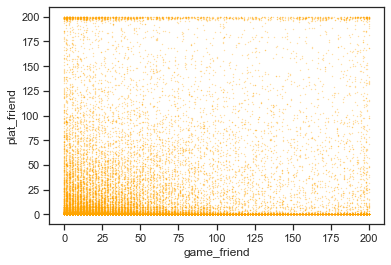

In [21]:
plt.scatter(all_accounts["friend_num_game"][all_accounts["is_steal"]],
            all_accounts["friend_num_plat"][all_accounts["is_steal"]],
            s= 0.1, alpha = 0.5, color = "orange", label ="is_steal")
plt.xlabel("game_friend")
plt.ylabel("plat_friend")
plt.show()

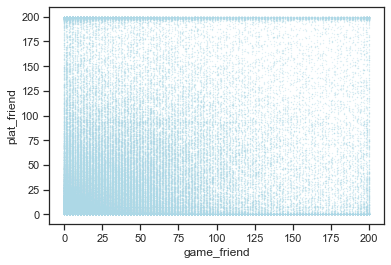

In [22]:
plt.scatter(all_accounts["friend_num_game"][np.logical_not(all_accounts["is_steal"])],
            all_accounts["friend_num_plat"][np.logical_not(all_accounts["is_steal"])],
            s= 0.1, alpha = 0.5, color = "lightblue", label ="not_steal")
plt.xlabel("game_friend")
plt.ylabel("plat_friend")
plt.show()

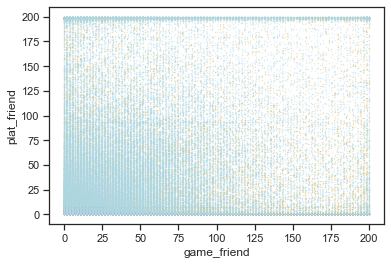

In [23]:
plt.scatter(all_accounts["friend_num_game"][all_accounts["is_steal"]],
            all_accounts["friend_num_plat"][all_accounts["is_steal"]],
            s= 0.1, alpha = 0.5, color = "orange", label ="is_steal")
plt.scatter(all_accounts["friend_num_game"][np.logical_not(all_accounts["is_steal"])],
            all_accounts["friend_num_plat"][np.logical_not(all_accounts["is_steal"])],
            s= 0.1, alpha = 0.5, color = "lightblue", label ="not_steal")
plt.xlabel("game_friend")
plt.ylabel("plat_friend")
plt.show()

## 特征对比

onlinetime


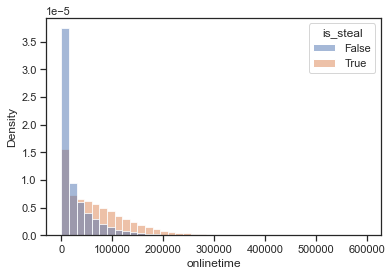

level


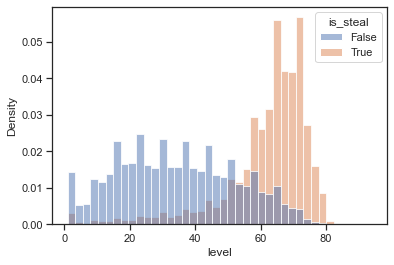

upvote


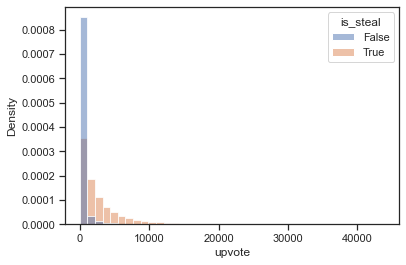

signup_num


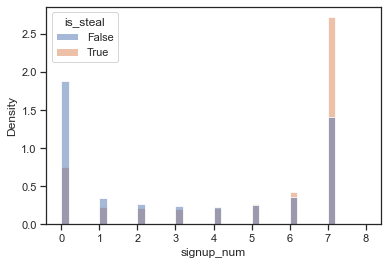

achievement_num


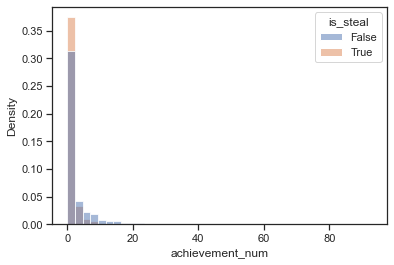

login_num


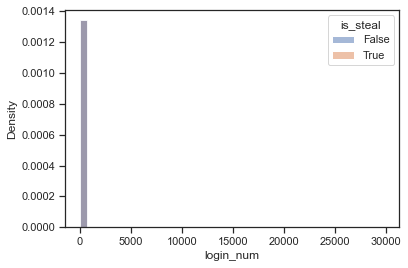

login_days


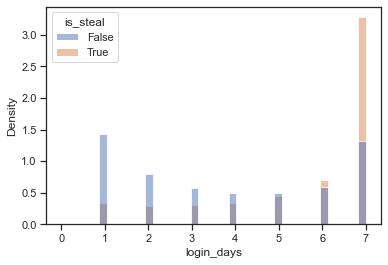

round_num


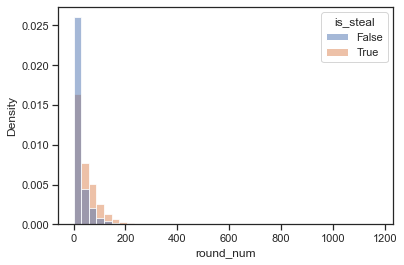

round_squad_num


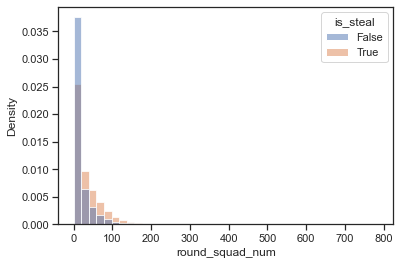

segment


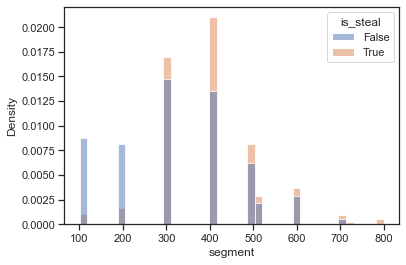

reward_num


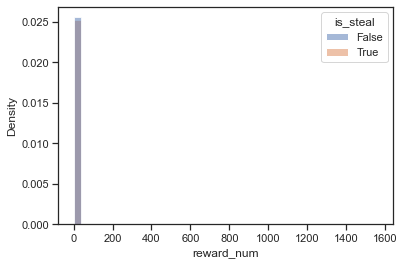

skin_num


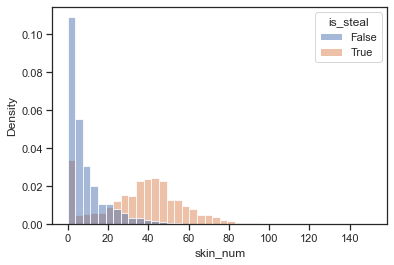

ip_counts


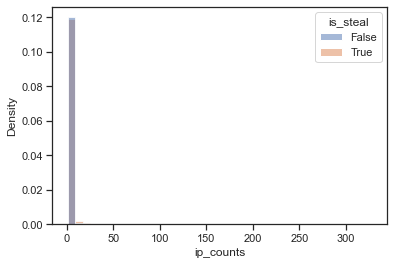

In [74]:
for feature in personal[:-1]:
    print(feature)
    sns.histplot(all_accounts, x = feature, hue = "is_steal", bins = 40, stat = "density" , common_norm=False)
        #,stat="density", common_norm=False)
    plt.show()

被盗账号的 总在线时长`onlinetime`，等级`level`，被点赞数`upvote`，周签到次数`signup_num`，周登录天数`login_days`，皮肤数`skin_num` 的特征分布大于正常账号。

avg_kill_count


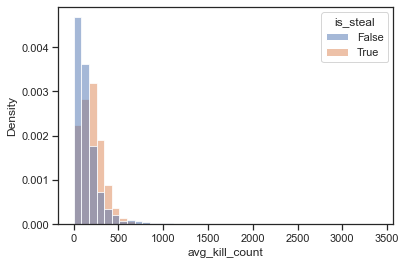

avg_hit_rate


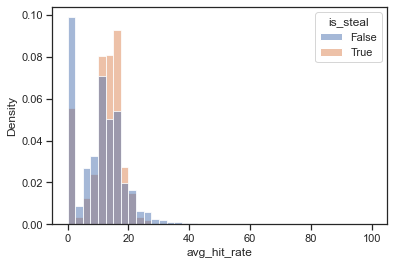

chicken_rate


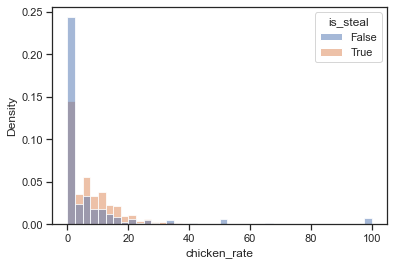

top10_rate


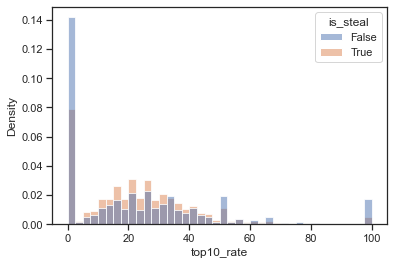

avg_damage


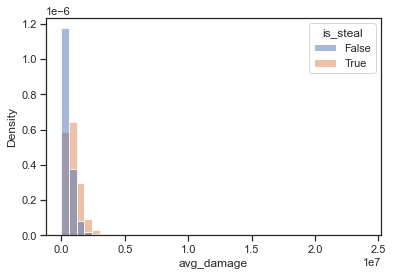

avg_box_num


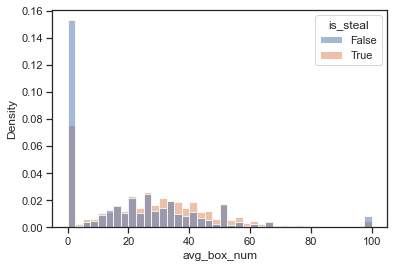

avg_survivaltime


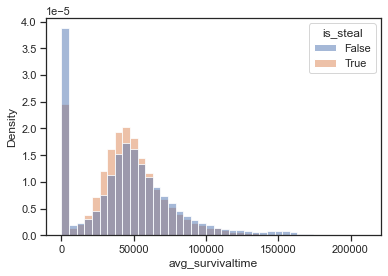

avg_moving


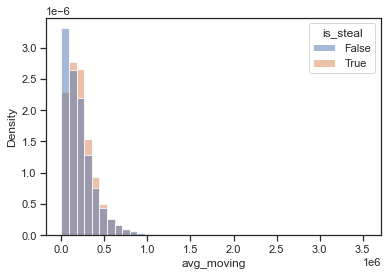

head_shoot_rate


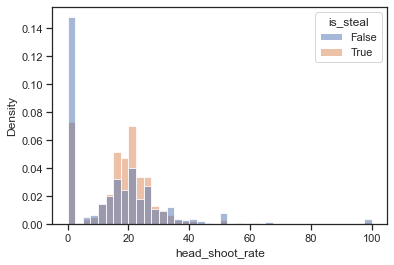

avg_gun_kill


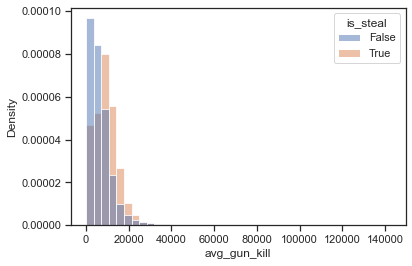

avg_assist


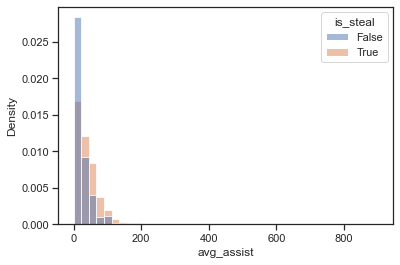

avg_healtimes


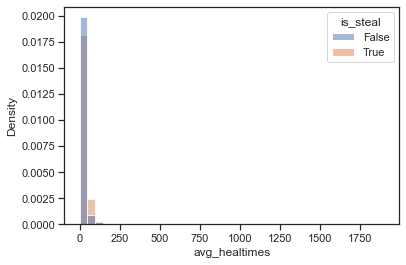

avg_healamount


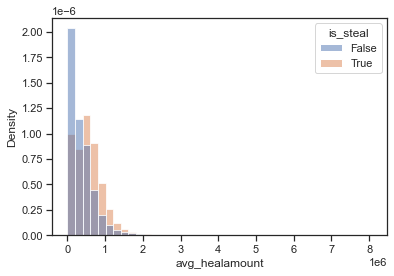

avg_cure


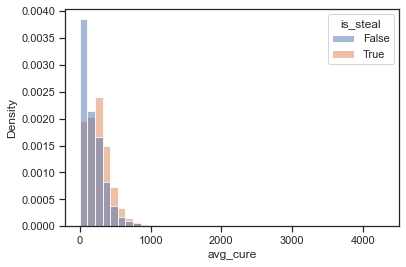

avg_hit_distance


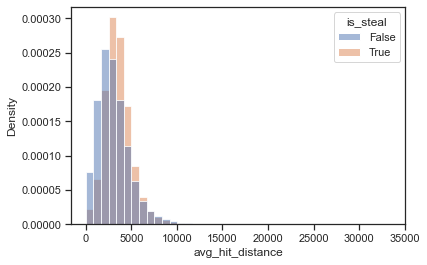

final_score


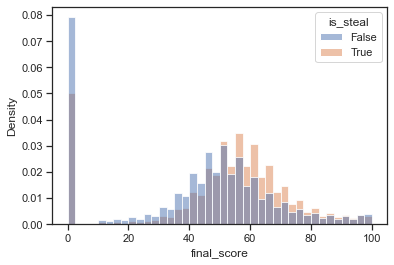

In [75]:
for feature in performance:
    print(feature)
    sns.histplot(all_accounts, x = feature, hue = "is_steal", bins = 40, stat="density", common_norm=False)
    plt.show()

Performance 类的特征，没有显著差异

friend_num_plat


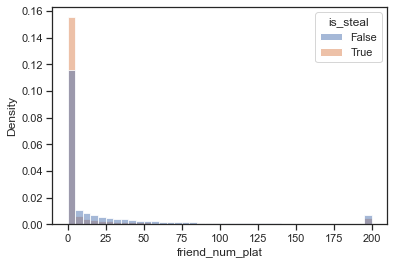

active_plat_num


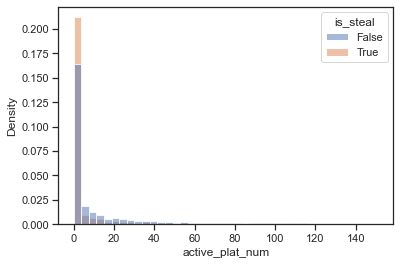

friend_num_game


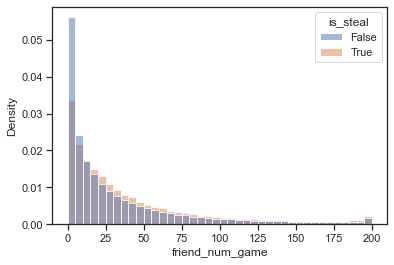

active_game_num


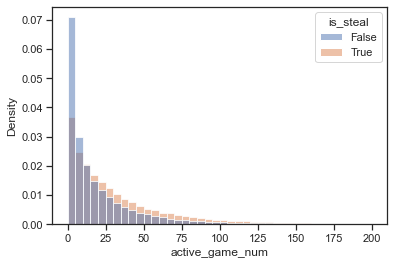

chat_num


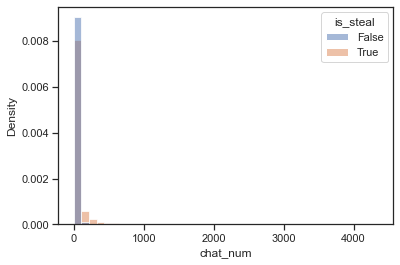

friend_chat_num


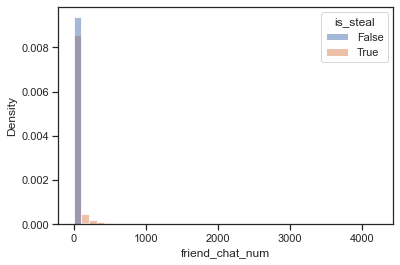

send_gold_num


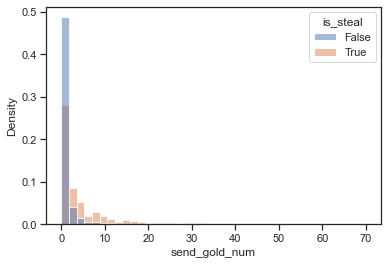

draw_gold_num


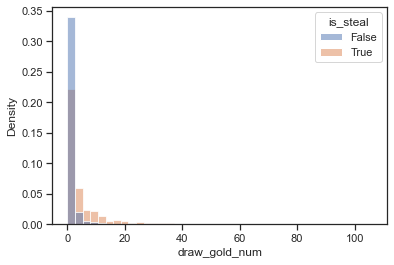

vote_num


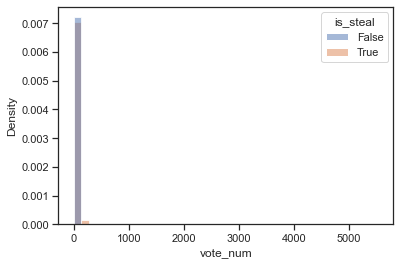

friend_vote_num


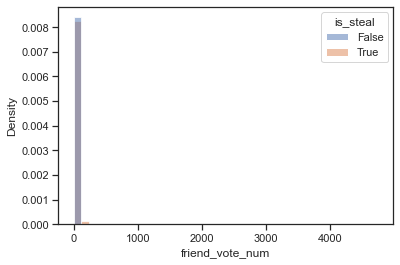

recruit_num


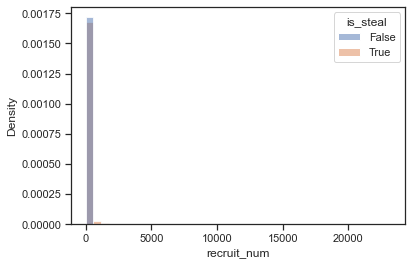

friend_recruit_num


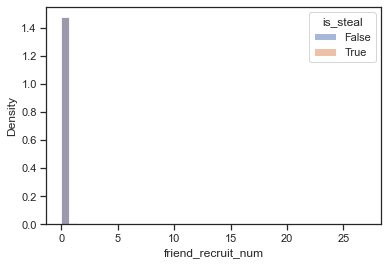

reply_recruit_num


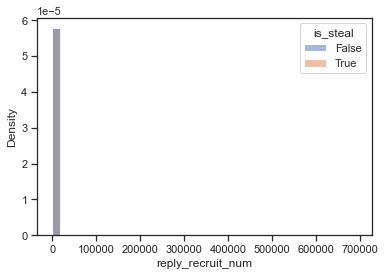

team_num


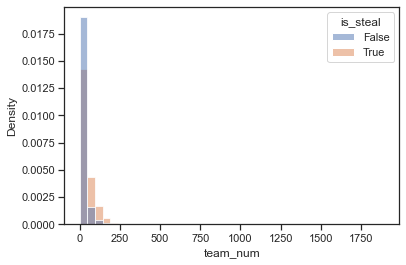

leader_team_num


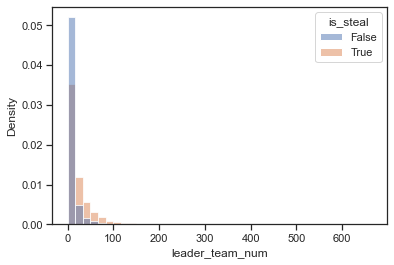

invite_team_num


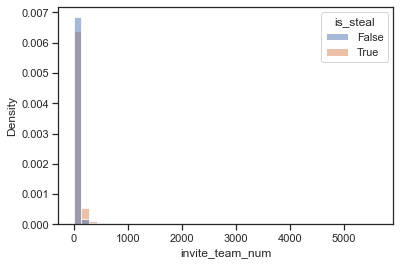

apply_relation_num


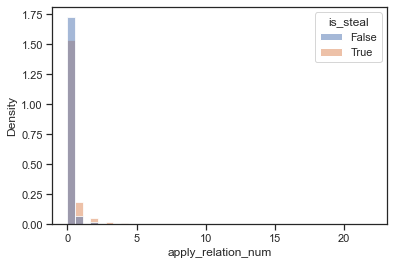

reply_relation_num


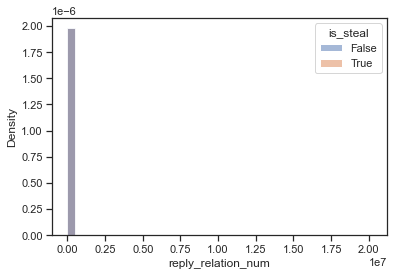

del_friend_num


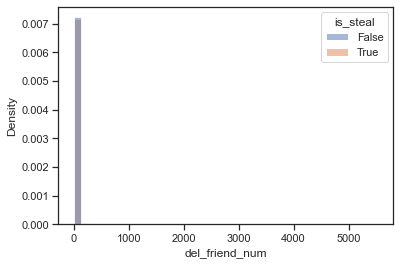

reject_friend_num


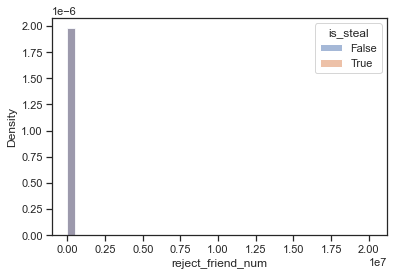

del_friend_apply_num


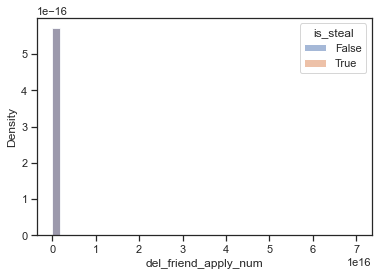

reject_relation_num


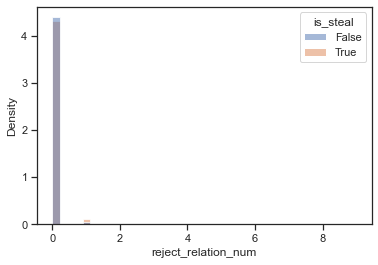

del_intimacy_num


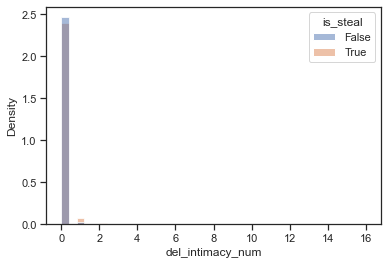

accept_invite_team_num


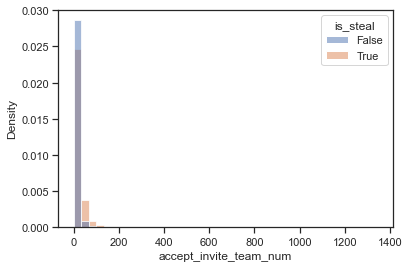

reject_invite_team_num


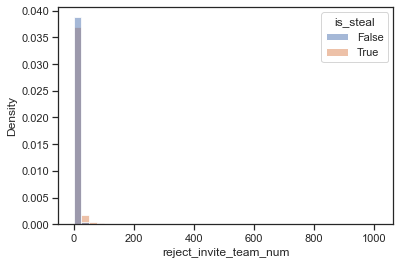

beaccept_invite_team_num


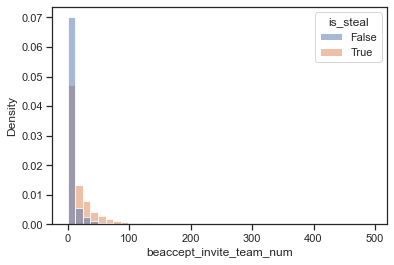

bereject_invite_team_num


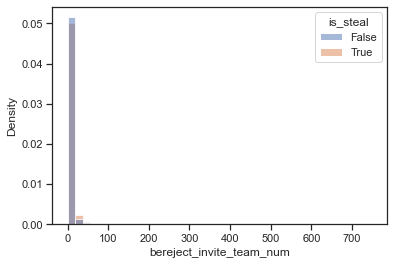

beaccept_apply_team_num


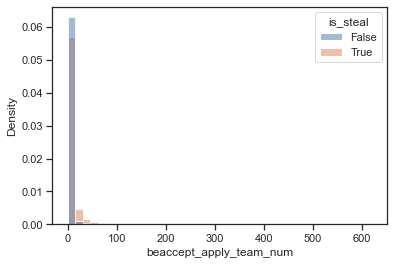

bereject_apply_team_num


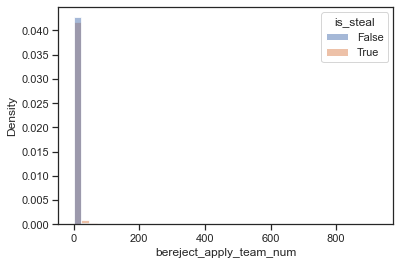

accept_apply_team_num


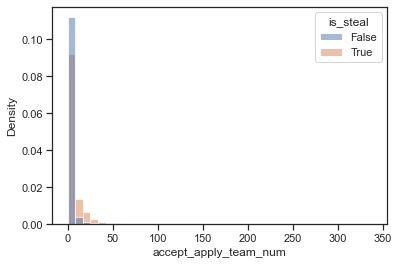

reject_apply_team_num


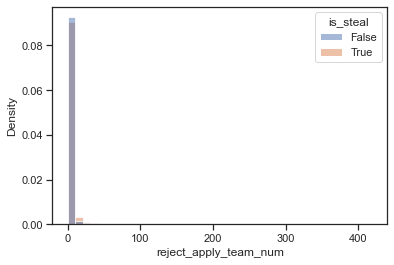

In [76]:
for feature in relations:
    print(feature)
    sns.histplot(all_accounts, x = feature, hue = "is_steal", bins = 40, stat="density", common_norm=False)
    plt.show()

c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22909 missing from c

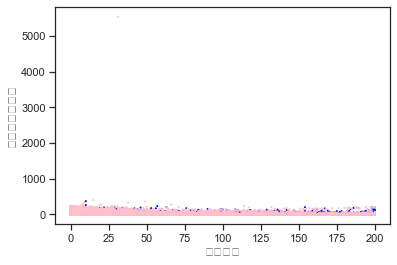

In [77]:
plt.scatter(all_accounts["friend_num_game"], all_accounts["del_friend_num"], s=1, 
            color = ["pink" if s else "blue" for s in all_accounts["is_steal"]])
plt.xlabel("好友人数")
plt.ylabel("已删除好友人数")
plt.savefig(r'figures/del_friend.png')

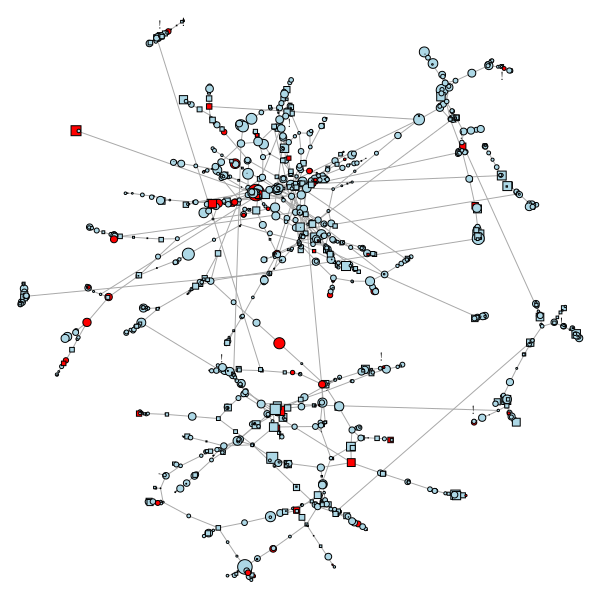

In [242]:
plot(g_sub, 
     "steal_cluster_6.png",
     vertex_size = np.minimum(np.array(g_sub.vs["onlinetime"])*3e-5,30), 
     vertex_shape = ["rectangle" if s else "circle" for s in g_sub.vs["friend_num_plat"]],
     edge_color = ["red" if s else "darkgray" for s in g_sub.es["is_plat_friend"]],
     edge_label = ["!" if s else "" for s in g_sub.es["is_plat_friend"]],
    **visual_style)
    #edge_color = ["red" if s else "gray"])

In [24]:
import json
with open(r'models/giant_cluster_within_steal_0628.json', 'r') as f:
    giant_cluster_within_steal_0628 = np.array(json.load(
        f))

In [25]:
all_accounts["is_in_giant_cluster_0628"] = False
all_accounts["is_in_giant_cluster_0628"][np.intersect1d(giant_cluster_within_steal_0628, all_accounts.index)] = True

<ipython-input-25-12878a98b203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_accounts["is_in_giant_cluster_0628"][np.intersect1d(giant_cluster_within_steal_0628, all_accounts.index)] = True
c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 导入平台好友网络

In [312]:
friend_list_plat = all_accounts["friend_list_plat"].apply(lambda s: np.intersect1d(np.array(str(s).split(sep="+")),
                                                                                        all_accounts.index,
                                                                                        assume_unique=True))

In [314]:
friends_info_plat = friend_list_plat[friend_list_plat.apply(lambda x: len(x))>0]

In [315]:
edge_list_plat = []
for i, v in enumerate(friends_info_plat):
    a = friends_info_plat.index[i]
    for b in v:
        edge_list_plat.append([a,b])
len(edge_list_plat)

27791

In [317]:
import json
with open(r'models/edge_list_plat_all_accounts_0628.json', 'w') as f:
    json.dump(edge_list_plat, f)

In [320]:
g_plat = Graph(directed=False)
# g.add_vertices(pd.concat([df["vroleid"], df["roleb"]]).unique())
g_plat.add_vertices(all_accounts.index)

In [321]:
g_plat.add_edges(edge_list_plat)
g_plat.simplify()

In [322]:
print(g_plat.summary())
print(g_plat.clusters().summary())
print(g_plat.clusters().giant().summary())

IGRAPH UN-- 253754 18634 -- 
+ attr: name (v)
Clustering with 253754 elements and 236118 clusters
IGRAPH UN-- 7050 7816 -- 
+ attr: name (v)


In [323]:
g= g_plat

## 导入游戏好友网络

In [83]:
g = Graph(directed=False)
g.add_vertices(all_accounts.index)

In [84]:
friend_list = all_accounts["friend_list_game"].apply(lambda s: np.intersect1d(np.array(str(s).split(sep="+")),
                                                                                        all_accounts.index,
                                                                                        assume_unique=True))

In [85]:
friends_info = friend_list[friend_list.apply(lambda x: len(x))>0]

In [86]:
edge_list = []
for i, v in enumerate(friends_info):
    a = friends_info.index[i]
    for b in v:
        edge_list.append([a,b])

In [87]:
g.add_edges(edge_list)
g.simplify()

In [353]:
g.vs["degree"] = g.degree()
g.vs["pagerank"] = g.pagerank()
for feature in [ "is_vpn", "del_friend_num", "friend_num_game", "onlinetime", "friend_num_plat", "is_steal", "is_in_giant_cluster_0628", "country"]:
    g.vs[feature] = all_accounts[feature]

In [334]:
print(g.summary())
print(g.clusters().summary())
print(g.clusters().giant().summary())

IGRAPH UN-- 253754 18634 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), friend_num_plat (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), is_plat_friend (e)
Clustering with 253754 elements and 236118 clusters
IGRAPH UN-- 7050 7816 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), friend_num_plat (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), is_plat_friend (e)


In [88]:
with open(r'models/network_20210726_all_accounts.pickle', 'wb') as f:
    pickle.dump(g, f)

In [244]:
with open(r'models/network_20210726_all_accounts.pickle', 'rb') as f:
    g = pickle.load(f)

In [324]:
g.es["is_plat_friend"] = False
for edge in edge_list_plat:
    eid = g.get_eid(edge[0], edge[1],error=False)
    if eid != -1:
        g.es[eid]["is_plat_friend"] = True
g.get_edge_dataframe()["is_plat_friend"].sum()

18634

In [340]:
np.where(np.array(g.clusters().sizes())>= 20)[0]

array([    4,  3414,  3770,  3965,  4534,  4557,  5404,  5427,  6157,
        6356,  7295,  7500, 10382, 14555, 14795, 16162, 18369, 18372,
       18444, 28619, 32590], dtype=int64)

In [401]:
id = 32590
g_sub = g.clusters().subgraph(id)

In [402]:
print(g_sub.summary())
print(g_sub.transitivity_undirected())
print(g_sub.transitivity_avglocal_undirected())
print(g_sub.get_vertex_dataframe()["country"].value_counts())

IGRAPH UN-- 21 23 -- 
+ attr: country (v), degree (v), del_friend_num (v), friend_num_game (v), friend_num_plat (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), is_plat_friend (e)
0.1875
0.38412698412698415
土耳其    21
Name: country, dtype: int64


In [403]:
visual_style = {}
visual_style["layout"] = g_sub.layout("auto")
#clientip = g_sub.get_vertex_dataframe()["vclientip"].mode()[0]
visual_style["vertex_color"] = ["red" if s else "lightblue" for s in g_sub.vs["is_steal"]]
#visual_style["vertex_shape"] = ["rectangle" if s else "circle" for s in g_sub.vs["is_vpn"]]
visual_style["vertex_shape"] = ["rectangle" if s else "circle" for s in g_sub.vs["is_in_giant_cluster_0628"]]

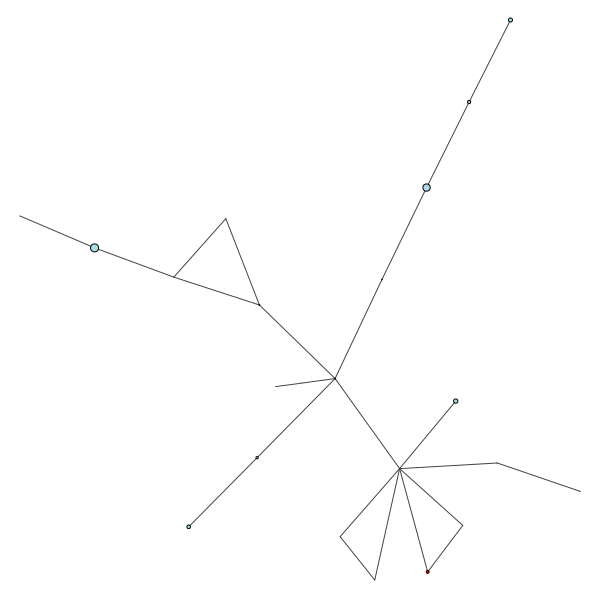

In [404]:
plot(g_sub, 
     "Turkey_plat_friends_cluster.png",
     #"steal_cluster_0726_" +str(id) + ".png",
     vertex_size = np.minimum(np.array(g_sub.vs["onlinetime"])*3e-5,30), **visual_style)

In [296]:
g_sub_communities = g_sub.community_leiden(resolution_parameter=0.05, n_iterations=-1)
print(g_sub_communities.summary())

Clustering with 8248 elements and 1368 clusters


In [297]:
np.where(np.array(g_sub_communities.sizes())>=10)[0]

array([   9,   23,   36,  185,  192,  320,  324,  809,  828,  867, 1071,
       1265, 1298], dtype=int64)

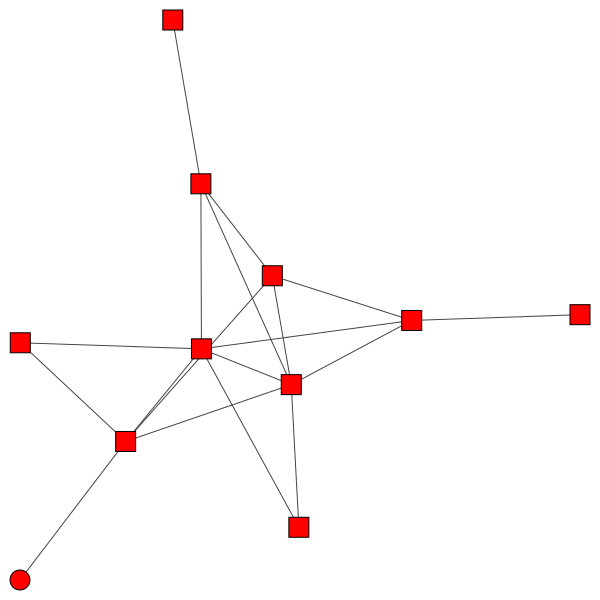

In [311]:
g_com = g_sub_communities.subgraph(1298)
plot(g_com, 
    vertex_color = ["red" if s else "lightblue" for s in g_com.vs["is_steal"]],
    vertex_shape = ["rectangle" if s else "circle" for s in g_com.vs["is_in_giant_cluster_0628"]])

In [34]:
g_steal = g.induced_subgraph(np.where(g.get_vertex_dataframe()["is_steal"])[0])
g_steal.summary()

'IGRAPH UN-- 53982 7092 -- \n+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)'

In [35]:
g_normal = g.induced_subgraph(np.where(np.logical_not(g.get_vertex_dataframe()["is_steal"]))[0])
g_normal.summary()

'IGRAPH UN-- 199772 16688 -- \n+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)'

In [36]:
g.ecount() - g_steal.ecount() - g_normal.ecount()

10339

In [38]:
with open(r'models/g_sub_giant_cluster_0628.pickle', 'rb') as f:
    g_giant_cluster_0628 = pickle.load(f)

In [41]:
edge_list_giant_0628 = []
for i, row in g_giant_cluster_0628.get_edge_dataframe().iterrows():
    if (g_giant_cluster_0628.vs[row[0]]["name"] in g_giant_cluster.vs["name"]) and (g_giant_cluster_0628.vs[row[1]]["name"] in g_giant_cluster.vs["name"]):
        edge_list_giant_0628.append([g_giant_cluster_0628.vs[row[0]]["name"], g_giant_cluster_0628.vs[row[1]]["name"]])

In [40]:
g_giant_cluster = g.induced_subgraph(np.where(g.get_vertex_dataframe()["is_in_giant_cluster_0628"])[0])

In [42]:
print(g_giant_cluster.summary())
print(g_giant_cluster.transitivity_undirected())
print(g_giant_cluster.transitivity_avglocal_undirected())
print(g_giant_cluster.clusters().summary())

IGRAPH UN-- 1401 769 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)
0.11283185840707964
0.15089111668059035
Clustering with 1401 elements and 715 clusters


In [43]:
visual_style = {}
visual_style["layout"] = g_giant_cluster.layout("auto")

In [46]:
edge_list_giant_0628_id = []
deleted_edge_id = []
for e in edge_list_giant_0628:
    eid = g_giant_cluster.get_eid(e[0], e[1], error = False)
    if eid == -1:
        deleted_edge_id.append(g_giant_cluster_0628_rearranged.get_eid(e[0],e[1]))
    else:
        edge_list_giant_0628_id.append(eid)
print(g_giant_cluster.ecount()-len(edge_list_giant_0628_id), len(deleted_edge_id))

115 870


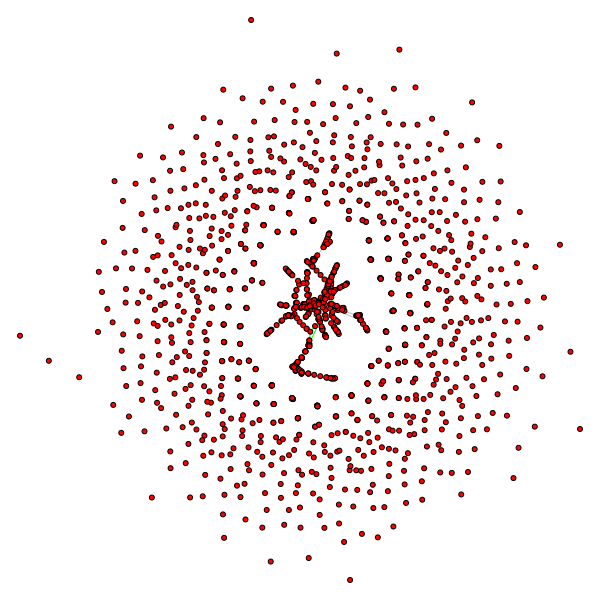

In [48]:
plot(g_giant_cluster,"giant_cluster_0726.png",  **visual_style, 
#      vertex_size = np.minimum(np.array(g_giant_cluster.vs["onlinetime"])*3e-5,20), 
     vertex_size = 5,
    edge_color = ["gray" if s in edge_list_giant_0628_id else "green" for s in range(g_giant_cluster.ecount())])

In [49]:
g_giant_cluster_0628_rearranged = g_giant_cluster.copy()
g_giant_cluster_0628_rearranged.delete_edges()
g_giant_cluster_0628_rearranged.add_edges(edge_list_giant_0628)
print(g_giant_cluster_0628_rearranged.summary())
print(g_giant_cluster_0628_rearranged.clusters().summary())

IGRAPH UN-- 1401 1524 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)
Clustering with 1401 elements and 50 clusters


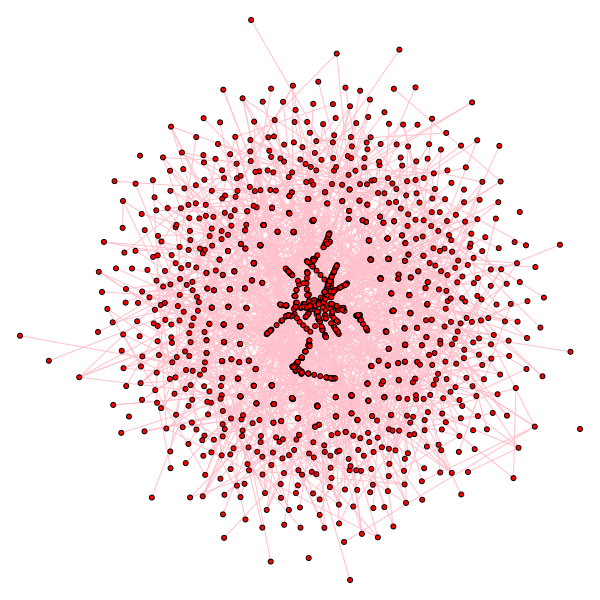

In [53]:
plot(g_giant_cluster_0628_rearranged, "giant_cluster_0628(1).png",   **visual_style, 
#     vertex_size = np.minimum(np.array(g_giant_cluster_0607_rearranged.vs["onlinetime"])*3e-5,20), 
     vertex_size = 5,
    edge_color = ["pink" if s in deleted_edge_id else "gray" for s in range(g_giant_cluster_0628_rearranged.ecount())])

# 调查团伙好友添加时间

In [89]:
add_friend_flow = pd.concat([pd.read_csv(r'data/addfri_20210401_20210531.txt', sep = '\t', dtype={"uid":str, "adduid":str}),
                             pd.read_csv(r'data/addfri_20210601_20210801.txt', sep = '\t', dtype={"uid":str, "adduid":str})])
print(add_friend_flow.head(5))
print(add_friend_flow.shape)

           dteventtime           vopenid         uid      adduid
0  2021-05-08 04:56:30  9951292055487784  5166771616  5230067022
1  2021-05-08 04:57:04  9951292055487784  5166771616  5396509601
2  2021-05-27 02:55:55  9951292055487784  5166771616   535869718
3  2021-04-11 00:49:32  9951292055487784  5166771616  5596650803
4  2021-04-14 05:23:05  9951292055487784  5166771616   512592356
(12725882, 4)


In [90]:
add_friend_flow["dteventtime"] = pd.to_datetime(add_friend_flow["dteventtime"])

In [71]:
print(add_friend_flow["uid"].isin(all_accounts.index).sum())
print(add_friend_flow["adduid"].isin(all_accounts.index).sum())
print(np.logical_and(add_friend_flow["uid"].isin(all_accounts.index),
                     add_friend_flow["adduid"].isin(all_accounts.index)).sum())
print(np.logical_or(add_friend_flow["uid"].isin(all_accounts.index),
                    add_friend_flow["adduid"].isin(all_accounts.index)).sum())

11736107
204669
189586
11751190


In [118]:
print(add_friend_flow["uid"].isin(all_accounts.index[all_accounts["is_steal"]]).sum())
print(add_friend_flow["adduid"].isin(all_accounts.index[all_accounts["is_steal"]]).sum())
print(np.logical_and(add_friend_flow["uid"].isin(all_accounts.index[all_accounts["is_steal"]]),
                     add_friend_flow["adduid"].isin(all_accounts.index[all_accounts["is_steal"]])).sum())
print(np.logical_or(add_friend_flow["uid"].isin(all_accounts.index[all_accounts["is_steal"]]),
                    add_friend_flow["adduid"].isin(all_accounts.index[all_accounts["is_steal"]])).sum())
print(np.logical_xor(add_friend_flow["uid"].isin(all_accounts.index[all_accounts["is_steal"]]),
                     add_friend_flow["adduid"].isin(all_accounts.index[all_accounts["is_steal"]])).sum())

11732923
141067
130752
11743238
11612486


In [117]:
print(add_friend_flow["uid"].isin(giant_cluster_within_steal_0628).sum())
print(add_friend_flow["adduid"].isin(giant_cluster_within_steal_0628).sum())
print(np.logical_and(add_friend_flow["uid"].isin(giant_cluster_within_steal_0628),
                     add_friend_flow["adduid"].isin(giant_cluster_within_steal_0628)).sum())
print(np.logical_or(add_friend_flow["uid"].isin(giant_cluster_within_steal_0628),
                    add_friend_flow["adduid"].isin(giant_cluster_within_steal_0628)).sum())
print(np.logical_xor(add_friend_flow["uid"].isin(giant_cluster_within_steal_0628),
                     add_friend_flow["adduid"].isin(giant_cluster_within_steal_0628)).sum())

478836
21084
4931
494989
490058


**全体玩家加好友数随时间变化**

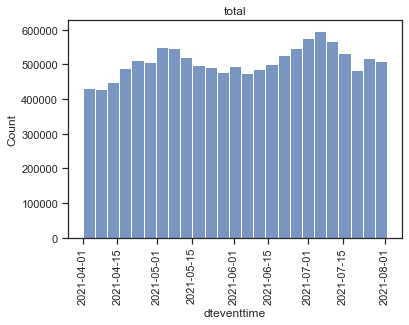

In [119]:
sns.histplot(add_friend_flow["dteventtime"], bins=25)
plt.xticks(rotation=90)
plt.title("total")
plt.savefig(r'figures/add_friend_flow_total.png')
plt.show()

**被盗账号之间加好友数随时间变化**

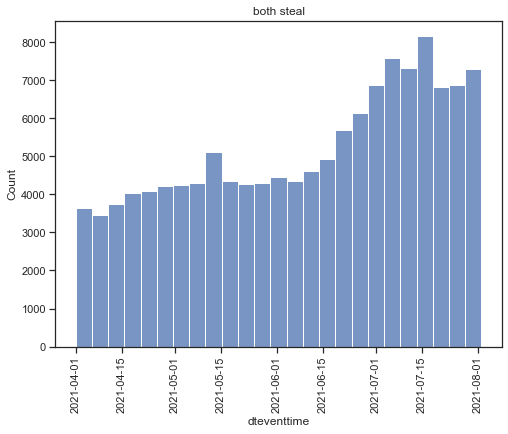

In [125]:
both_steal = np.logical_and(add_friend_flow["uid"].isin(all_accounts.index[all_accounts["is_steal"]]),
                            add_friend_flow["adduid"].isin(all_accounts.index[all_accounts["is_steal"]]))
plt.figure(figsize = [8,6])
sns.histplot(add_friend_flow["dteventtime"][both_steal], bins=25)
plt.xticks(rotation=90)
plt.title("both steal")
plt.savefig(r'figures/add_friend_flow_both_steal.png')
plt.show()

**被盗账号与正常账号之间加好友数随时间变化**

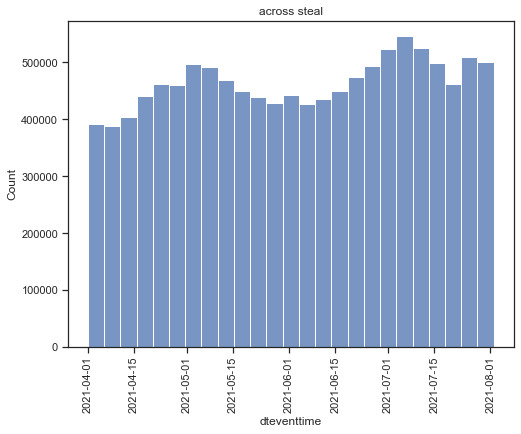

In [126]:
across_steal = np.logical_xor(add_friend_flow["uid"].isin(all_accounts.index[all_accounts["is_steal"]]),
                              add_friend_flow["adduid"].isin(all_accounts.index[all_accounts["is_steal"]]))
plt.figure(figsize = [8,6])
sns.histplot(add_friend_flow["dteventtime"][across_steal], bins=25)
plt.xticks(rotation=90)
plt.title("across steal")
plt.savefig(r'figures/add_friend_flow_across_steal.png')
plt.show()

**“盗号团伙”内加好友数随时间变化**

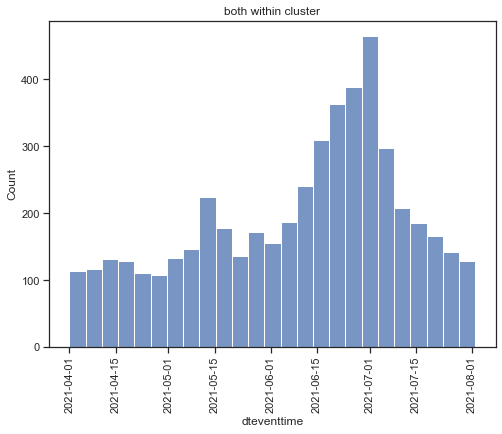

In [127]:
both_within_cluster = np.logical_and(add_friend_flow["uid"].isin(giant_cluster_within_steal_0628),
                                     add_friend_flow["adduid"].isin(giant_cluster_within_steal_0628))
plt.figure(figsize = [8,6])
sns.histplot(add_friend_flow["dteventtime"][both_within_cluster], bins=25)
plt.xticks(rotation=90)
plt.title("both within cluster")
plt.savefig(r'figures/add_friend_flow_within_cluster.png')
plt.show()